In [3]:
import pandas as pd
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/perch.csv'
df = pd.read_csv(url)
# 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(df,perch_weight,test_size=0.3,random_state=20)

from sklearn.preprocessing import PolynomialFeatures
poly =  PolynomialFeatures(degree=5, include_bias=False)
poly.fit(x_train) 
train_poly = poly.transform(x_train)
test_poly = poly.transform(x_test)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly) # 적용할 데이터의 형태나 정보를 적용하고
train_poly_scaled = ss.transform(train_poly) # 실제 데이터 변환
test_poly_scaled = ss.transform(test_poly) # 실제 데이터 변환

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_poly_scaled,y_train)
print(ridge.score(train_poly_scaled,y_train), ridge.score(test_poly_scaled,y_test))

0.9894009402423172 0.9878434882536237


In [12]:
# 규제알고리즘 : 릿지
# 적절한 규제강도 찾기
alphas = [0.001,0.01,0.1,1.0,10,100]
train_score, test_score = [],[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_poly_scaled,y_train)
    train_score.append(ridge.score(train_poly_scaled,y_train))  # 훈련데이터 측정값
    test_score.append(ridge.score(test_poly_scaled, y_test))   # 검증데이터 측정값

In [14]:
import matplotlib.pyplot as plt

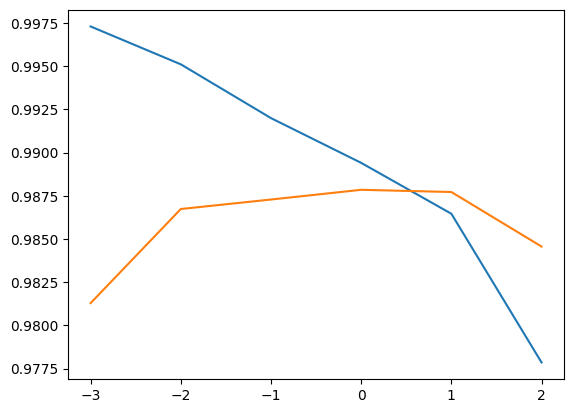

In [21]:
plt.plot([-3,-2,-1,0,1,2],train_score)
plt.plot([-3,-2,-1,0,1,2],test_score)

In [23]:
# 릿지의 최적의 규제 강도는 1.5
ridge = Ridge(alpha=1.5)
ridge.fit(train_poly_scaled,y_train)
print(ridge.score(train_poly_scaled,y_train))  # 훈련데이터 측정값
print(ridge.score(test_poly_scaled, y_test))   # 검증데이터 측정값

0.9889027285042481
0.9878714552298882


In [24]:
from sklearn.linear_model import Lasso

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.383e+04, tolerance: 4.007e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+04, tolerance: 4.007e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

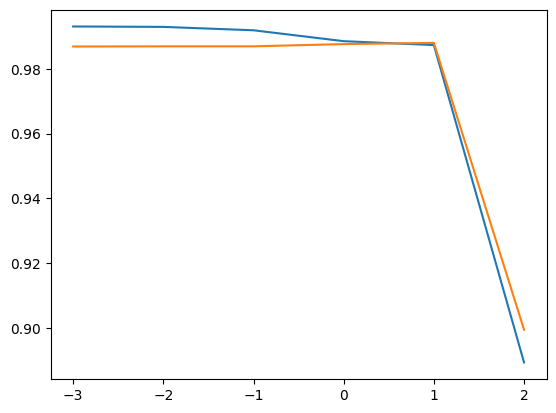

In [27]:
# 규제알고리즘 : 라쏘
# 적절한 규제강도 찾기
alphas = [0.001,0.01,0.1,1.0,10,100]
train_score, test_score = [],[]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_poly_scaled,y_train)
    train_score.append(lasso.score(train_poly_scaled,y_train))  # 훈련데이터 측정값
    test_score.append(lasso.score(test_poly_scaled, y_test))   # 검증데이터 측정값
plt.plot([-3,-2,-1,0,1,2],train_score)
plt.plot([-3,-2,-1,0,1,2],test_score)    

In [29]:
lasso = Lasso(alpha=1.0)
lasso.fit(train_poly_scaled,y_train)
print(lasso.score(train_poly_scaled,y_train))  # 훈련데이터 측정값
print(lasso.score(test_poly_scaled, y_test))   # 검증데이터 측정값

0.9885485842324375
0.9876496254839684


## 다중회귀 : 여러개의 특성(다항)을 사용하는 회귀
## 특성공학 : 특성을 조합해서 새로운 특성을 만드는 과정
## 릿지 : 오차(계수)의 제곱의 평균이 작아지도록..  
## 라쏘 : 오차(계수)의 제곱의 절대값이 작아지도록..
## 하이퍼파라메터 : 직접 수치를 조정해서 성능향상을 유도하는 매개변수들..

# 다양한 분류 알고리즘 

In [30]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/fish_data_more.csv'
df = pd.read_csv(url)

In [32]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [33]:
# 분류모델
# 지도학습  독립변수 / 종속변수
#           학습피처 / 정답피처 
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [34]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [35]:
X.shape, Y.shape

((159, 5), (159,))

In [39]:
ss =  StandardScaler()
X = ss.fit_transform(X)

In [40]:
x_train,x_test,y_train,y_test =  train_test_split(X,Y,train_size=0.7,random_state=42)

In [41]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((111, 5), (111,), (48, 5), (48,))

In [42]:
from sklearn.neighbors import KNeighborsClassifier
kn =  KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train,y_train)
print(kn.score(x_train,y_train))
print(kn.score(x_test, y_test))

0.8648648648648649
0.8541666666666666


In [43]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [45]:
x_test[:5], y_test[:5]

C:\Users\user\AppData\Local\Temp\ipykernel_18964\3430528090.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x_test[:5], y_test[:5]


(array([[-0.89764797, -0.90949257, -1.02189157, -0.88276427, -0.77006246],
        [-1.07867599, -1.49923797, -1.53166901, -1.53087787, -1.87354735],
        [-0.55576841,  0.36360863,  0.30871396, -0.79644898, -0.61998757],
        [-0.35960801, -0.22613678, -0.21834407, -0.13822469, -0.1010926 ],
        [-0.69588298, -0.50696792, -0.58123649, -0.87824723, -0.47098378]]),
 78         Perch
 155        Smelt
 128         Pike
 55     Whitefish
 94         Perch
 Name: Species, dtype: object)

In [46]:
kn.predict(x_test[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [50]:
print(kn.classes_)
print(kn.predict_proba(x_test[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.         0.         1.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.66666667 0.         0.33333333 0.
  0.        ]
 [0.         0.         0.66666667 0.         0.33333333 0.
  0.        ]]


In [67]:
_,indexs =  kn.kneighbors(x_test[[3]])

In [68]:
y_train.values[indexs]

array([['Roach', 'Perch', 'Perch']], dtype=object)

### 회귀인데.. 분류 모델인 로지스틱회귀
### 로지스틱회귀는 값을 예측하지만 내부에 시그모이드 함수를 적용해서 결과를 0~1사이의 값으로 반환하고
### 그 값을 기본임계치인 0.5를 적용해서 0.5보다 크면 양성클래스 이고 그렇지 않으면 음성 클래스
### 결국은 이진분류이다....... 여기서 이진... binary  , 둘중에 하나

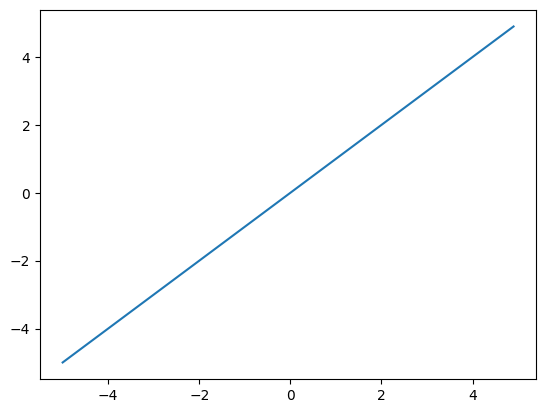

In [72]:
# 시그모이드(로지스틱) 함수
z = np.arange(-5,5,0.1)
plt.plot(z,z)
plt.show()   

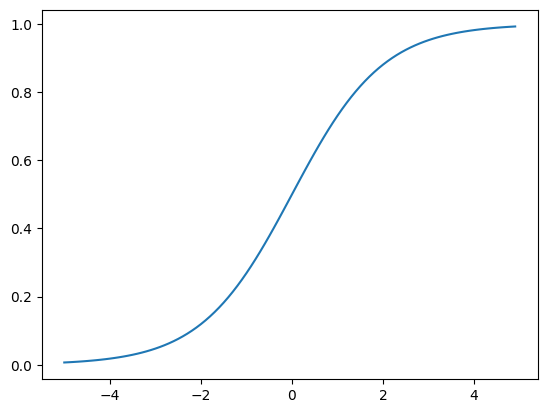

In [77]:
def mySigmoid(z):
    y = 1 / (1 + np.exp(-z))
    return y
y =  mySigmoid(z)
plt.plot(z,y)
plt.show()

# 이진분류 작업  (두개의 클래스만 선택)

In [83]:
 binary_indexs = (y_train == 'Bream') | (y_train == 'Smelt') 

In [86]:
x =  x_train[binary_indexs]
y =  y_train[binary_indexs]

In [87]:
x.shape, y.shape

((30, 5), (30,))

In [88]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [91]:
lr.predict(x[:5]), y[:5].values

C:\Users\user\AppData\Local\Temp\ipykernel_18964\1920793428.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  lr.predict(x[:5]), y[:5].values


(array(['Bream', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object),
 array(['Bream', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object))

In [92]:
lr.predict_proba(x[:5])

array([[9.84692895e-01, 1.53071052e-02],
       [9.97395276e-01, 2.60472443e-03],
       [3.60400304e-02, 9.63959970e-01],
       [9.71703204e-01, 2.82967960e-02],
       [9.99457341e-01, 5.42659465e-04]])

In [93]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [94]:
lr.coef_, lr.intercept_

(array([[-0.41364678, -0.5889627 , -0.67650653, -0.99116819, -0.73345497]]),
 array([-2.18690859]))

In [95]:
df.head(1)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.52,4.02


In [96]:
# 처음 5개 셈플에대한 Z 값을 계산
lr.decision_function(x[:5])

array([-4.1640127 , -5.94782027,  3.28641949, -3.53630183, -7.51848576])

In [103]:
mySigmoid(lr.decision_function(x[:5]))

array([1.53071052e-02, 2.60472443e-03, 9.63959970e-01, 2.82967960e-02,
       5.42659465e-04])

In [102]:
# 시그모이드 함수를 구현한 라이브러리
from scipy.special import expit

In [104]:
expit(lr.decision_function(x[:5]))

array([1.53071052e-02, 2.60472443e-03, 9.63959970e-01, 2.82967960e-02,
       5.42659465e-04])

# 로지스틱 회귀로 다중 분류
    로지스틱회귀는 기본적으로 반복학습 : 기본 값이 100
    규제알고리즘을 적용 : L2규제(릿지) 를 제어하는 매개변수가 C 가 alpha처럼 규제 강도인데.. 반대이다..
    C가 작을수록 규제 강도가 커진다  기본이 1 

In [127]:
lr = LogisticRegression(C=25,max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(C=25, max_iter=1000)

In [128]:
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.9369369369369369, 0.9375)

In [130]:
lr.predict(x_test[:5]), y_test[:5].values

C:\Users\user\AppData\Local\Temp\ipykernel_18964\3233308327.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  lr.predict(x_test[:5]), y_test[:5].values


(array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object),
 array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object))

In [142]:
np.argmax(lr.predict_proba(x_test[:5]),axis=1)

array([2, 5, 3, 4, 2], dtype=int64)

In [145]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [146]:
# 다중분류일때 선형방정식의 모양은
lr.coef_.shape, lr.intercept_.shape

((7, 5), (7,))

### 이진분류에서 사용했던 Z를 7개 계산한다
### 다중분류는 클래스마다 Z값을 계산한다.
### 가장높은 z값을 가지는 클래스가 예측한 클래스 이다.
### 소프트맥스 함수를 이용해서 7개의 z값을 확률로 변환

### 이진 분류일때는 z값을 시그모이드 맥스 함수를 적용해서 확률로 변환
### 다중 분류일때는 클래스 개수만큼 z값을 구하고 그 z값을 을 소프트 맥스 함수를 적용해서 확률로 변환